## Pooja Patel
## Stock Trading Project

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,precision_score,recall_score,auc,f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# getting stock data from last 5 years
apple_df = yf.download("AAPL", start="2016-01-01", end="2022-09-30")
apple_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,25.652500,26.342501,25.500000,26.337500,24.151497,270597600
2016-01-05 00:00:00-05:00,26.437500,26.462500,25.602501,25.677500,23.546272,223164000
2016-01-06 00:00:00-05:00,25.139999,25.592501,24.967501,25.174999,23.085484,273829600
2016-01-07 00:00:00-05:00,24.670000,25.032499,24.107500,24.112499,22.111170,324377600
2016-01-08 00:00:00-05:00,24.637501,24.777500,24.190001,24.240000,22.228085,283192000
...,...,...,...,...,...,...
2022-09-23 00:00:00-04:00,151.190002,151.470001,148.559998,150.429993,150.429993,95939200
2022-09-26 00:00:00-04:00,149.660004,153.770004,149.639999,150.770004,150.770004,93339400
2022-09-27 00:00:00-04:00,152.740005,154.720001,149.949997,151.759995,151.759995,84442700


In [ ]:
# Adj close : The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. 
apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,25.652500,26.342501,25.500000,26.337500,24.151497,270597600
2016-01-05 00:00:00-05:00,26.437500,26.462500,25.602501,25.677500,23.546272,223164000
2016-01-06 00:00:00-05:00,25.139999,25.592501,24.967501,25.174999,23.085484,273829600
2016-01-07 00:00:00-05:00,24.670000,25.032499,24.107500,24.112499,22.111170,324377600
2016-01-08 00:00:00-05:00,24.637501,24.777500,24.190001,24.240000,22.228085,283192000


In [ ]:
apple_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-23 00:00:00-04:00,151.190002,151.470001,148.559998,150.429993,150.429993,95939200
2022-09-26 00:00:00-04:00,149.660004,153.770004,149.639999,150.770004,150.770004,93339400
2022-09-27 00:00:00-04:00,152.740005,154.720001,149.949997,151.759995,151.759995,84442700
2022-09-28 00:00:00-04:00,147.639999,150.639999,144.839996,149.839996,149.839996,146691400
2022-09-29 00:00:00-04:00,146.100006,146.720001,140.679993,142.479996,142.479996,128138200


In [ ]:
apple_df.shape

(1698, 6)

In [ ]:
apple_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1.698000e+03
mean,76.733888,77.608809,75.901686,76.792986,75.380646,1.223391e+08
std,48.663659,49.298624,48.031565,48.686327,49.159853,5.796674e+07
min,22.500000,22.917500,22.367500,22.584999,20.949612,4.100000e+07
25%,38.889374,39.182499,38.503125,38.863750,36.991401,8.443498e+07
50%,52.157499,52.480000,51.726250,52.190001,50.585888,1.067858e+08
75%,124.999998,126.411873,123.845623,125.105001,124.154730,1.424527e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,5.334788e+08


### Preprocessing and clean the data

In [ ]:
apple_df = apple_df.reset_index()

In [ ]:
# Let's make sure 'date' is actually a date in pandas
apple_df['Date'] = pd.to_datetime(apple_df['Date'])

date = apple_df["Date"]

In [ ]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   Date       1698 non-null   datetime64[ns, America/New_York]
 1   Open       1698 non-null   float64                         
 2   High       1698 non-null   float64                         
 3   Low        1698 non-null   float64                         
 4   Close      1698 non-null   float64                         
 5   Adj Close  1698 non-null   float64                         
 6   Volume     1698 non-null   int64                           
dtypes: datetime64[ns, America/New_York](1), float64(5), int64(1)
memory usage: 93.0 KB


In [ ]:
# checking any null values in dataset
apple_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## EDA

In [ ]:
from pandas.core.frame import DataFrame
#Line Graph For Volume
def line_graph_close(df, title):
  fig = px.line(df,x="Date", y="Volume", title= title)
  fig.show()

# Volume is the number of shares of a security traded during a given period of time.
# Volume is an important indicator in technical analysis because it is used to measure the relative significance of a market move.

In [ ]:
line_graph_close(apple_df , title='Apple Volume On each day')

In [ ]:
#OHLC Chart To check Everyday Open close High Low share Price
def ohlc_graph(df):
  fig = go.Figure(go.Candlestick(x=df.Date,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']))
  fig.show()

In [ ]:
ohlc_graph(apple_df)

## Strategy 1 : 

In [ ]:
import numpy as np
y = np.where(apple_df['Close'].shift(-1) > apple_df['Close'],1, -1)

In [ ]:
apple_df['Signal'] = y

In [ ]:
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume,Signal
0,2016-01-04 00:00:00-05:00,25.652500,26.342501,25.500000,26.337500,24.151497,270597600,-1
1,2016-01-05 00:00:00-05:00,26.437500,26.462500,25.602501,25.677500,23.546272,223164000,-1
2,2016-01-06 00:00:00-05:00,25.139999,25.592501,24.967501,25.174999,23.085484,273829600,-1
3,2016-01-07 00:00:00-05:00,24.670000,25.032499,24.107500,24.112499,22.111170,324377600,1
4,2016-01-08 00:00:00-05:00,24.637501,24.777500,24.190001,24.240000,22.228085,283192000,1
...,...,...,...,...,...,...,...,...
1693,2022-09-23 00:00:00-04:00,151.190002,151.470001,148.559998,150.429993,150.429993,95939200,1
1694,2022-09-26 00:00:00-04:00,149.660004,153.770004,149.639999,150.770004,150.770004,93339400,1
1695,2022-09-27 00:00:00-04:00,152.740005,154.720001,149.949997,151.759995,151.759995,84442700,-1
1696,2022-09-28 00:00:00-04:00,147.639999,150.639999,144.839996,149.839996,149.839996,146691400,-1


In [ ]:
signal_map_dict= {-1:'Sell', 1:'Buy'}

In [ ]:
apple_df['stock_signal'] = apple_df['Signal'].map(signal_map_dict)

In [ ]:
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal
0,2016-01-04 00:00:00-05:00,25.652500,26.342501,25.500000,26.337500,24.151497,270597600,-1,Sell
1,2016-01-05 00:00:00-05:00,26.437500,26.462500,25.602501,25.677500,23.546272,223164000,-1,Sell
2,2016-01-06 00:00:00-05:00,25.139999,25.592501,24.967501,25.174999,23.085484,273829600,-1,Sell
3,2016-01-07 00:00:00-05:00,24.670000,25.032499,24.107500,24.112499,22.111170,324377600,1,Buy
4,2016-01-08 00:00:00-05:00,24.637501,24.777500,24.190001,24.240000,22.228085,283192000,1,Buy
...,...,...,...,...,...,...,...,...,...
1693,2022-09-23 00:00:00-04:00,151.190002,151.470001,148.559998,150.429993,150.429993,95939200,1,Buy
1694,2022-09-26 00:00:00-04:00,149.660004,153.770004,149.639999,150.770004,150.770004,93339400,1,Buy
1695,2022-09-27 00:00:00-04:00,152.740005,154.720001,149.949997,151.759995,151.759995,84442700,-1,Sell
1696,2022-09-28 00:00:00-04:00,147.639999,150.639999,144.839996,149.839996,149.839996,146691400,-1,Sell


In [ ]:
apple_df['stock_signal'].value_counts()

Buy     905
Sell    793
Name: stock_signal, dtype: int64

In [ ]:
sample_df = apple_df.groupby(apple_df['Date'].dt.year)['stock_signal'].value_counts().unstack()
sample_df

stock_signal,Buy,Sell
Date,,
2016,133,119
2017,138,113
2018,129,122
2019,146,106
2020,136,117
2021,135,117
2022,88,99


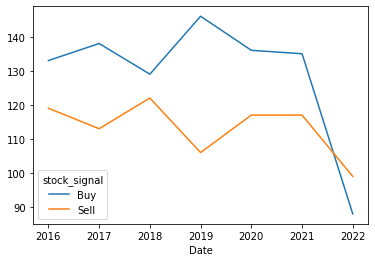

In [ ]:
apple_df.groupby(apple_df['Date'].dt.year)['stock_signal'].value_counts().unstack().plot()

Based on above graph, we can see that mostly people are buying stocks rather than selling them. 

And in 2019 (during pandemic time), mostly people are buying stocks.

In [ ]:
X = apple_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = apple_df['Signal']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

def get_confusion_matrix(cm,title):
    ax = sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',annot_kws={"fontsize":14})
    ax.set_title(title+'\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');
    return plt.show()

def classification_algorithm(algo_instance, X_train, y_train, X_test, title):
  print("{} Algorithm :".format(title))
  algo_pred = algo_instance.fit(X_train, y_train)
  algo_pred = algo_instance.predict(X_test)
  print(classification_report(y_test,algo_pred))
  algo_cm = confusion_matrix(y_test, algo_pred)
  # getting confusion matrix
  get_confusion_matrix(algo_cm, title="{} Confusion Matrix".format(title))

KNeighbors Classifier Algorithm :
              precision    recall  f1-score   support

          -1       0.44      0.42      0.43       153
           1       0.54      0.56      0.55       187

    accuracy                           0.50       340
   macro avg       0.49      0.49      0.49       340
weighted avg       0.50      0.50      0.50       340



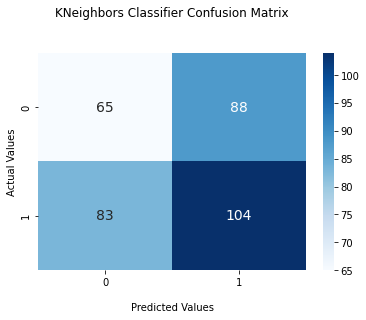

Random Forest Classifier Algorithm :
              precision    recall  f1-score   support

          -1       0.41      0.37      0.38       153
           1       0.52      0.56      0.54       187

    accuracy                           0.47       340
   macro avg       0.46      0.46      0.46       340
weighted avg       0.47      0.47      0.47       340



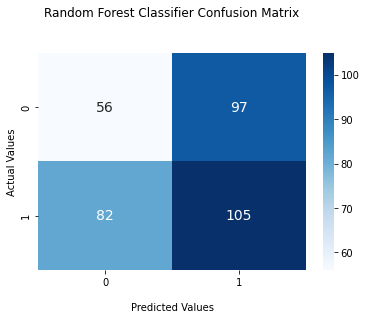

GradientBoosting Classifier Algorithm :
              precision    recall  f1-score   support

          -1       0.47      0.27      0.34       153
           1       0.56      0.75      0.64       187

    accuracy                           0.53       340
   macro avg       0.51      0.51      0.49       340
weighted avg       0.52      0.53      0.50       340



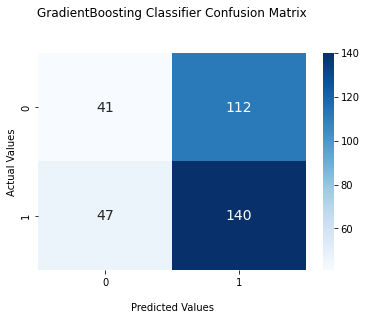

SVM Confusion Matrix Algorithm :
              precision    recall  f1-score   support

          -1       0.61      0.07      0.13       153
           1       0.56      0.96      0.71       187

    accuracy                           0.56       340
   macro avg       0.59      0.52      0.42       340
weighted avg       0.58      0.56      0.45       340



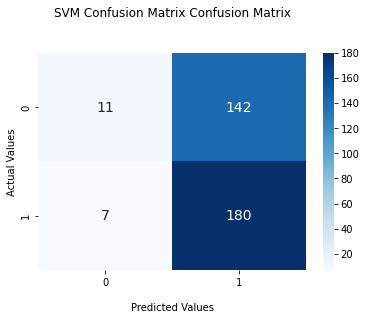

XGBClassifier Confusion Matrix Algorithm :
              precision    recall  f1-score   support

          -1       0.43      0.28      0.34       153
           1       0.54      0.70      0.61       187

    accuracy                           0.51       340
   macro avg       0.49      0.49      0.48       340
weighted avg       0.49      0.51      0.49       340



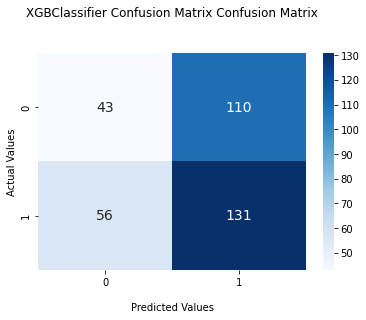

In [ ]:
classification_algorithm(KNeighborsClassifier(), X_train, y_train, X_test, title='KNeighbors Classifier')
classification_algorithm(RandomForestClassifier(), X_train, y_train, X_test, title='Random Forest Classifier')
classification_algorithm(GradientBoostingClassifier(), X_train, y_train, X_test, title='GradientBoosting Classifier')
classification_algorithm(SVC(), X_train, y_train, X_test, title='SVM Confusion Matrix')
classification_algorithm(XGBClassifier(), X_train, y_train, X_test, title='XGBClassifier Confusion Matrix')

In [ ]:
## Hyperparameter Tuning with SVM


# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
clf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.941 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.930 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.937 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.985 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.985 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.978 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

#### Support Vector with best parameter

Support Vector Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        63
         1.0       0.99      1.00      1.00       277

    accuracy                           0.99       340
   macro avg       1.00      0.98      0.99       340
weighted avg       0.99      0.99      0.99       340



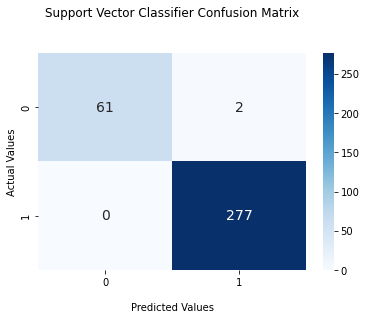

In [ ]:
classification_algorithm(SVC(C=10, gamma=0.01, kernel='rbf'), X_train, y_train, X_test, title='Support Vector Classifier')

# Strategy 2

In [ ]:
# Moving Average : The moving average (MA) is used to identify the direction of a current price trend, without the interference of shorter-term price spikes.

In [ ]:
apple_df['MA 50'] = apple_df['Close'].rolling(window=50).mean()
apple_df['MA 200'] = apple_df['Close'].rolling(window=200).mean()

In [ ]:
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal,MA 50,MA 200,Signal_target,Position
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151497,270597600,-1,Sell,NaN,NaN,0.0,0.0
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000,-1,Sell,NaN,NaN,0.0,0.0
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085484,273829600,-1,Sell,NaN,NaN,0.0,0.0
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111170,324377600,1,Buy,NaN,NaN,0.0,0.0
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228085,283192000,1,Buy,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2022-09-23,151.190002,151.470001,148.559998,150.429993,150.429993,95939200,1,Buy,160.2058,160.59220,0.0,0.0
1694,2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400,1,Buy,160.2178,160.47065,0.0,0.0
1695,2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700,-1,Sell,160.3116,160.35665,0.0,0.0
1696,2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400,-1,Sell,160.2884,160.20860,1.0,1.0


In [ ]:
apple_df['Date'] = pd.to_datetime(apple_df['Date']).dt.date

In [ ]:
fig1 = go.Figure(data=go.Scatter(x=apple_df['Date'], y=apple_df['Close'], mode='lines', name='Close Price'))
fig1.add_trace(go.Scatter(x=apple_df['Date'], y=apple_df['Close'].rolling(window=50).mean(),marker_color='Orange',name='50 MA'))
fig1.add_trace(go.Scatter(x=apple_df['Date'], y=apple_df['Close'].rolling(window=200).mean(), marker_color='Red', name='200 MA'))
fig1.show()

**Conclusion** : From Above graph plottings, We can visualize that, as much as the rolling window is small, the moving average is somehow significant and closer to the actual data.

In [ ]:
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal,MA 50,MA 200,Signal_target,Position
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151497,270597600,-1,Sell,NaN,NaN,0.0,0.0
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000,-1,Sell,NaN,NaN,0.0,0.0
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085484,273829600,-1,Sell,NaN,NaN,0.0,0.0
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111170,324377600,1,Buy,NaN,NaN,0.0,0.0
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228085,283192000,1,Buy,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2022-09-23,151.190002,151.470001,148.559998,150.429993,150.429993,95939200,1,Buy,160.2058,160.59220,0.0,0.0
1694,2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400,1,Buy,160.2178,160.47065,0.0,0.0
1695,2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700,-1,Sell,160.3116,160.35665,0.0,0.0
1696,2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400,-1,Sell,160.2884,160.20860,1.0,1.0


In [ ]:
apple_df = apple_df.reset_index()

In [ ]:
apple_df

,index,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal,MA 50,MA 200
0,0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151495,270597600,-1,Sell,NaN,NaN
1,1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546274,223164000,-1,Sell,NaN,NaN
2,2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085482,273829600,-1,Sell,NaN,NaN
3,3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111168,324377600,1,Buy,NaN,NaN
4,4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228085,283192000,1,Buy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1693,1693,2022-09-23,151.190002,151.470001,148.559998,150.429993,150.429993,95939200,1,Buy,160.2058,160.59220
1694,1694,2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400,1,Buy,160.2178,160.47065
1695,1695,2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700,-1,Sell,160.3116,160.35665
1696,1696,2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400,-1,Sell,160.2884,160.20860


In [ ]:
apple_df['Signal_target'] = np.where(apple_df['MA 50'] > apple_df['MA 200'], 1.0, 0.0)

In [ ]:
apple_df['Position'] = apple_df['Signal_target'].diff()
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Signal,stock_signal,MA 50,MA 200,Signal_target,Position
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151497,270597600,-1,Sell,NaN,NaN,0.0,NaN
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000,-1,Sell,NaN,NaN,0.0,0.0
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085484,273829600,-1,Sell,NaN,NaN,0.0,0.0
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111170,324377600,1,Buy,NaN,NaN,0.0,0.0
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228085,283192000,1,Buy,NaN,NaN,0.0,0.0


In [ ]:
# droping nan values 
apple_df=apple_df.dropna(how='all')

In [ ]:
fig1 = go.Figure(data=go.Scatter(x=apple_df['Date'], y=apple_df['Close'], mode='lines', name='Close Price'))
fig1.add_trace(go.Scatter(x=apple_df['Date'], y=apple_df['Close'].rolling(window=50).mean(),marker_color='Orange',name='50 MA'))
fig1.add_trace(go.Scatter(x=apple_df['Date'], y=apple_df['Close'].rolling(window=200).mean(), marker_color='darkslategray', name='200 MA'))

fig1.add_trace(go.Scatter(x=apple_df[apple_df['Position'] == 1].Date, y=apple_df['MA 50'][apple_df['Position'] == 1], marker_symbol='triangle-up',
                          marker_color="Green",mode='markers',
                          marker_size=15, name='Buy (Golden Cross)'))
fig1.add_trace(go.Scatter(x=apple_df[apple_df['Position'] == -1].Date, y=apple_df['MA 50'][apple_df['Position'] == -1], 
                          marker_symbol='triangle-down',mode='markers',
                          marker_color="Red", marker_size=15,name='Sell (Death Cross'))
fig1.show()

In [ ]:
### Algorithm for Strategy 2 

In [ ]:
# prepocessing and clean the data
apple_df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Signal             0
stock_signal       0
MA 50             49
MA 200           199
Signal_target      0
Position           1
dtype: int64

In [ ]:
# filling Nan values with 0
apple_df.fillna(0, inplace=True)

In [ ]:
X = apple_df[['MA 50','MA 200']]
y = apple_df['Signal_target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

KNeighbors Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        63
         1.0       1.00      1.00      1.00       277

    accuracy                           1.00       340
   macro avg       1.00      0.99      1.00       340
weighted avg       1.00      1.00      1.00       340



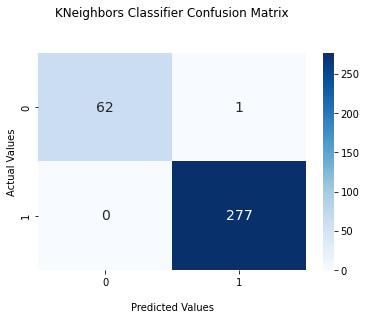

Random Forest Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        63
         1.0       0.99      1.00      0.99       277

    accuracy                           0.99       340
   macro avg       0.99      0.98      0.99       340
weighted avg       0.99      0.99      0.99       340



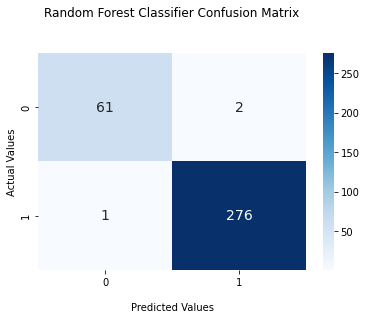

GradientBoosting Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        63
         1.0       0.99      1.00      1.00       277

    accuracy                           0.99       340
   macro avg       1.00      0.98      0.99       340
weighted avg       0.99      0.99      0.99       340



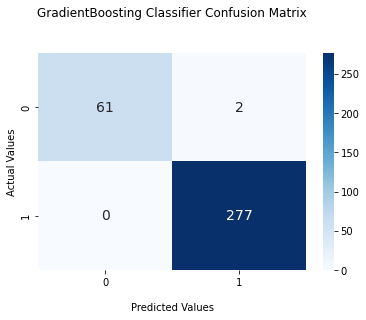

SVM Confusion Matrix Algorithm :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        63
         1.0       0.96      1.00      0.98       277

    accuracy                           0.96       340
   macro avg       0.98      0.90      0.93       340
weighted avg       0.96      0.96      0.96       340



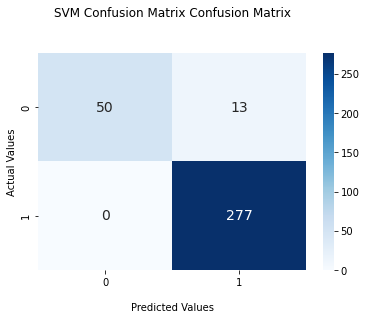

XGBClassifier Confusion Matrix Algorithm :
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        63
         1.0       0.99      1.00      1.00       277

    accuracy                           0.99       340
   macro avg       1.00      0.98      0.99       340
weighted avg       0.99      0.99      0.99       340



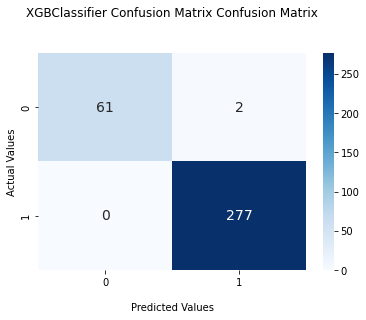

In [ ]:
classification_algorithm(KNeighborsClassifier(), X_train, y_train, X_test, title='KNeighbors Classifier')
classification_algorithm(RandomForestClassifier(), X_train, y_train, X_test, title='Random Forest Classifier')
classification_algorithm(GradientBoostingClassifier(), X_train, y_train, X_test, title='GradientBoosting Classifier')
classification_algorithm(SVC(), X_train, y_train, X_test, title='SVM Confusion Matrix')
classification_algorithm(XGBClassifier(), X_train, y_train, X_test, title='XGBClassifier Confusion Matrix')

In [ ]:
## Hyperparameter Tuning with Random Forest 

rf = RandomForestClassifier()
forest_params = [{'n_estimators':[200,250,300,450], 'criterion':['gini','entropy']}]

clf = GridSearchCV(rf, forest_params, cv = 5,verbose=2)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.9s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.9s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.4s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.4s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.4s
[CV] END ...................criterion=gini, n_estimators=250; total time=   0.5s
[CV] END ...................criterion=gini, n_estimators=250; total time=   0.6s
[CV] END ...................criterion=gini, n_estimators=250; total time=   0.5s
[CV] END ...................criterion=gini, n_estimators=250; total time=   0.5s
[CV] END ...................criterion=gini, n_estimators=250; total time=   0.5s
[CV] END ...................criterion=gini, n_estimators=300; total time=   0.6s
[CV] END ...................criterion=gini, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [200, 250, 300, 450]}],
             verbose=2)

In [ ]:
clf.best_params_

{'criterion': 'gini', 'n_estimators': 300}

Random Forest Classifier Algorithm :
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        63
         1.0       0.99      1.00      0.99       277

    accuracy                           0.99       340
   macro avg       0.99      0.98      0.99       340
weighted avg       0.99      0.99      0.99       340



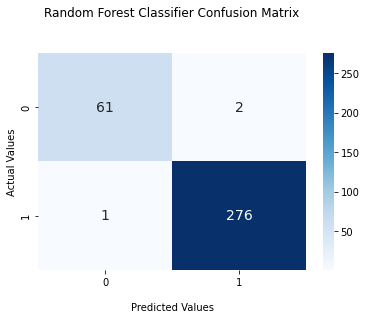

In [ ]:
classification_algorithm(RandomForestClassifier(criterion='entropy', n_estimators=200), X_train, y_train, X_test, title='Random Forest Classifier')

## Conclude :

Strategy 1 & 2 are useful interms of predicting when to buy or sell a stock.

However, Stock predictions also depend on many other factors such as 

*   Economic indicators, 
*   Interest rates, 
*   Other important economic news,
*   Dividends, 
*   Major announcements

**Strategy 1 Best Model** :

     Support Vector Classifer 


**Strategy 2 Best Model** :

      Random Forest 